In [278]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import functions_new_jit as func
import importlib
importlib.reload(func)

import numba
from numba import cuda

In [279]:
def simulate_riot_primer(system, steps = 50):
    """
    Inputs:
        system := System class variable that contains all Agents
        steps := number of the simulation's time steps
    
    This functions simulates a set of 2 simultaneous riots that occur in 2 distinct sectors using the stochastic threshold model. There are a set of Agents in a reservoir that can
    enter sectors 0 or 1 to riot. Each sector has a size, so the thrsehold of each Agent is based on the number of Agents rioting in a sector compared with the number of Agents that
    can be in that sector.
     
    
    Outpurs:
         A np.array "progression" that contains the time evolution of each riots over time.
         A list "reservoirs" that contains all the system.reservoir numpy arrays of the simulation.
         A list "sector0s" that contains all the system.sector0 numpy arrays of the simulation.
         A list "sector1s" that contains all the system.sector1 numpy arrays of the simulation.
         
    """
    
    reservoirs = []
    sector0s = []
    sector1s = []
    reservoirs.append(np.copy(system.reservoir))
    sector0s.append(np.copy(system.sector0))
    sector1s.append(np.copy(system.sector1))
    progression = np.zeros((2,steps+1), dtype = np.int64)              # array that stores the riot's evolution over time
    
    for i in range(1,steps+1):
        system.update_wishes_reservoir()             # check reservoir Agents (enter riot)
        system.update_reservoir()                    # move Agents from reservoir
        reservoirs.append(np.copy(system.reservoir))
        sector0s.append(np.copy(system.sector0))
        sector1s.append(np.copy(system.sector1))
           
        progression[0][i] = len(system.sector0)
        progression[1][i] = len(system.sector1)
            
    return progression, reservoirs, sector0s, sector1s

In [280]:
def print_data(reservoirs, sector0s, sector1s):
    N = len(reservoirs)
    
    for i in range(N):
        
        print("Reservoir")
        print(len(reservoirs[i]))
        if len(reservoirs[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(reservoirs[i])):
                print([reservoirs[i][j].name, reservoirs[i][j].threshold], end = " ")
                
        print("\n")
                
        print("Sector0")
        print(len(sector0s[i]))
        if len(sector0s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector0s[i])):
                print([sector0s[i][j].name, sector0s[i][j].threshold], end = " ")
                
        print("\n")
        
        print("Sector1")
        print(len(sector1s[i]))
        if len(sector1s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector1s[i])):
                print([sector1s[i][j].name, sector1s[i][j].threshold], end = " ")
                
        print("\n")

In [281]:
def write_data(reservoirs, sector0s, sector1s):

    file = open("simulation_data", 'w')
    
    N = len(reservoirs)
    
    for i in range(N):
        
        print("Reservoir")
        print(len(reservoirs[i]))
        if len(reservoirs[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(reservoirs[i])):
                print(reservoirs[i][j].name, end = " ")
                
        print("\n")
                
        print("Sector0")
        print(len(sector0s[i]))
        if len(sector0s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector0s[i])):
                print(sector0s[i][j].name, end = " ")
                
        print("\n")
        
        print("Sector1")
        print(len(sector1s[i]))
        if len(sector1s[i]) == 0:
            print("-1", end = "")
        else:
            for j in range(len(sector1s[i])):
                print(sector1s[i][j].name, end = " ")
                
        print("\n")

Reservoir
100
[0, 33] [1, 9] [2, 22] [3, 8] [4, 0] [5, 11] [6, 0] [7, 33] [8, 23] [9, 18] [10, 8] [11, 23] [12, 15] [13, 31] [14, 20] [15, 31] [16, 4] [17, 10] [18, 34] [19, 9] [20, 16] [21, 13] [22, 17] [23, 27] [24, 13] [25, 26] [26, 16] [27, 0] [28, 9] [29, 11] [30, 19] [31, 21] [32, 12] [33, 0] [34, 19] [35, 12] [36, 6] [37, 27] [38, 6] [39, 10] [40, 0] [41, 30] [42, 2] [43, 11] [44, 7] [45, 17] [46, 13] [47, 27] [48, 10] [49, 18] [50, 29] [51, 7] [52, 3] [53, 21] [54, 31] [55, 22] [56, 22] [57, 6] [58, 39] [59, 19] [60, 2] [61, 20] [62, 11] [63, 11] [64, 0] [65, 14] [66, 5] [67, 23] [68, 0] [69, 12] [70, 4] [71, 22] [72, 9] [73, 24] [74, 4] [75, 18] [76, 20] [77, 16] [78, 28] [79, 16] [80, 1] [81, 5] [82, 8] [83, 18] [84, 26] [85, 16] [86, 0] [87, 11] [88, 20] [89, 17] [90, 17] [91, 4] [92, 10] [93, 0] [94, 15] [95, 31] [96, 21] [97, 29] [98, 32] [99, 14] 

Sector0
0
-1

Sector1
0
-1

Reservoir
95
[0, 33] [1, 9] [2, 22] [3, 8] [5, 11] [6, 0] [7, 33] [8, 23] [9, 18] [10, 8] [11, 23

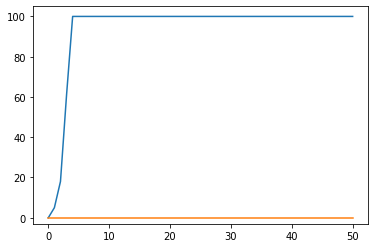

In [283]:
N = 100
average = 15
deviation = 12

agents = func.create_agents(N,average,deviation)

# naming the agents
func.name_agents(agents)

sector0_size = 100
sector1_size = 0
steps = 50

system = func.System(agents, sector0_size, sector1_size)
progression, reservoirs, sector0s, sector1s = simulate_riot_primer(system, steps)

print_data(reservoirs, sector0s, sector1s)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3, N+5)
plt.show()